In [36]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from heapq import nsmallest
from scipy.signal import butter, lfilter, freqz
from scipy.fftpack import fft, ifft
from scipy import integrate
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import CubicSpline , interp1d

In [37]:
#Lecture data: lines klaus, cromospheric spectrum, VALD
lines_ =  pd.read_excel("lines.xlsx",sheet_name="cromospheric_lines", columns = ['waveobs', 'element','wave_base', 'wave_top'] )
lines_['waveobs'] = lines_['waveobs']/10
c_s = pd.read_csv('Subtracted_spectrum_F1-9.txt', delimiter = '\t', header = 0)
Atomic_lines = pd.read_csv('atomic_lines.tsv', delimiter = '\t', usecols = ['element', 'wave_A','loggf'], header = 0, low_memory=False, keep_default_na= False)

## Found absortion lines

In [15]:
#found point that correspond to absortion lines in cromospheric spectrum
new_list = []
for i in range(len(lines_['waveobs'])):
    new_list.append(nsmallest(1,c_s['waveobs'], key = lambda x: abs(x-lines_['waveobs'][i]))[0])

In [40]:
#Create new list with contain the absortion lines in cromospheric spectrum with its respective element
lines_s = pd.DataFrame(columns = ['waveobs','element', 'flux', 'error_f'])
L = []
I = []

for i in range(len(new_list)-1):
    L.append(c_s[c_s["waveobs"] == new_list[i]]["waveobs"].tolist()[0])
    I.append(c_s[c_s["waveobs"] == new_list[i]]['flux'].tolist()[0])
lines_s['waveobs'] = L
lines_s['flux'] = I
lines_s['element'] = lines_['element']
lines_s['error_f'] = c_s['err']

In [18]:
#Separate by elements
Fe1 = lines_s[lines_s['element']=='Fe1']
Ti2 = lines_s[lines_s['element']=='Ti2']
Fe2 = lines_s[lines_s['element']=='Fe2']

Fe1.index = list(range(len(Fe1)))
Ti2.index = list(range(len(Ti2)))
Fe2.index = list(range(len(Fe2)))

## Associate atomic data

In [19]:
#Separate by elements the atomic lines for decrease the amount of data
Fe1_ = Atomic_lines[Atomic_lines['element']=='Fe 1']
Fe2_ = Atomic_lines[Atomic_lines['element']=='Fe 2']
Ti2_ = Atomic_lines[Atomic_lines['element']=='Ti 2']

#Use just workin data range
Fe1_VALD = Fe1_[(Fe1_['wave_A'] >= 3760) & (Fe1_['wave_A'] <= 4420)]
Fe1_VALD.index = list(range(len(Fe1_VALD)))
Fe2_VALD = Fe2_[(Fe2_['wave_A'] >= 3760) & (Fe2_['wave_A'] <= 4590)]
Fe2_VALD.index = list(range(len(Fe2_VALD)))
Ti2_VALD = Ti2_[(Ti2_['wave_A'] >= 3760) & (Ti2_['wave_A'] <= 4590)]
Ti2_VALD.index = list(range(len(Ti2_VALD)))

#Working in nm
Fe1_VALD['wave_A'] = Fe1_VALD['wave_A']/10
Fe2_VALD['wave_A'] = Fe2_VALD['wave_A']/10
Ti2_VALD['wave_A'] = Ti2_VALD['wave_A']/10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [23]:
new_listgf = []
gf = []
for i in range(len(Ti2['waveobs'])):
    x = abs(nsmallest(1,Ti2_VALD['wave_A'], key = lambda x: abs(x-Ti2['waveobs'][i]))[0] - Ti2['waveobs'][i])
    if x < 0.02:
        new_listgf.append(nsmallest(1,Ti2_VALD['wave_A'], key = lambda x: abs(x-Ti2['waveobs'][i]))[0])
        gf.append(Ti2_VALD['loggf'][i])
        

33

# Base and top

In [60]:
listt = []
for i in range(len(Ti2_gf["wave_base"])):
    listt.append([Ti2_gf["wave_base"][i], Ti2_gf["wave_top"][i]])
for i in listt:
    print(i)


[376.05199999997353, 376.23199999997354]
[378.55299999991433, 378.73299999991434]
[381.25899999985035, 381.43899999985035]
[381.37799999984753, 381.55799999984754]
[388.1479999996874, 388.3279999996874]
[389.9749999996442, 390.1549999996442]
[391.2659999996137, 391.4459999996137]
[393.1209999995698, 393.3009999995698]
[398.11999999945164, 398.29999999945164]
[401.1569999993798, 401.3369999993798]
[402.4339999993496, 402.61399999934963]
[402.7529999993421, 402.9329999993421]
[417.27399999899876, 417.45399999899877]
[428.94199999872285, 429.12199999872286]
[429.3299999987136, 429.5099999987136]
[429.9249999986995, 430.1049999986995]
[430.11299999869516, 430.29299999869517]
[430.709999998681, 430.889999998681]
[431.2059999986693, 431.3859999986693]
[431.4179999986642, 431.5979999986642]
[433.71199999861, 433.89199999861]
[434.34899999859493, 434.52899999859494]
[439.4229999984749, 439.6029999984749]
[439.8969999984637, 440.0769999984637]
[441.69199999842135, 441.87199999842136]
[444.29999

In [24]:
Ti2_gf = pd.DataFrame(columns = ['waveobs','element', 'flux', 'loggf', 'wave_base', 'wave_top', 'error_f'])
Ti2_gf['waveobs'] = Ti2['waveobs']
Ti2_gf['element'] = Ti2['element']
Ti2_gf['flux'] = Ti2['flux']
Ti2_gf['loggf'] = gf
Ti2_gf['wave_base'] = Ti2['waveobs']-0.08
Ti2_gf['wave_top'] = Ti2['waveobs']+0.1
Ti2_gf['error_f'] = c_s['err']

## Equivalent Width

#### Fit

In [25]:
#Number of splines
def step_continuum(Lmin,Lmax,splines):
    return (Lmax-Lmin)/splines

#New dots to found continuous
def Points_continuum(_lambda, Intensity,start,end,step):
    
    steps_list = np.arange(start,end, step)
    grouped_data = {}
    grouped_data['L'] = []
    grouped_data['I'] = []
    for i in range(1,len(steps_list)):
        grouped_lambda = _lambda[(_lambda >= steps_list[i-1]) & (_lambda < steps_list[i])]

        grouped_data['L'].append(grouped_lambda)
        grouped_data['I'].append(Intensity[  grouped_lambda.index  ])
    return grouped_data

#Fit contunuous to line data
def fit_continuum(grouped_data, L_min, L_max):  
    newdataL = [] 
    newdataI = []
    for i in range(len(grouped_data['I'])):
        newdataL.append(grouped_data['L'][i].median())
        newdataI.append(grouped_data['I'][i].median())
        data_fitL = [x for x in newdataL if str(x) != 'nan']
        data_fitI = [x for x in newdataI if str(x) != 'nan']
    cs = InterpolatedUnivariateSpline(data_fitL,data_fitI)
    xs =  np.linspace(L_min,  L_max, 100)
    fit =  pd.DataFrame({'L': xs, 'I': cs(xs)})
    return fit

In [26]:
step = step_continuum(Ti2_gf['wave_base'][0],Ti2_gf['wave_top'][0],20)

grouped_data = Points_continuum(c_s['waveobs'], c_s['flux'],Ti2_gf['wave_base'][0],Ti2_gf['wave_top'][0],step)

fit1 = fit_continuum(grouped_data, Ti2_gf['wave_base'][0], Ti2_gf['wave_top'][0])
fit = fit1[12:88]

#### Pseudocontinuou

In [27]:
def pseudocontinuou(Data,LMIN, LMAX):
    pseudo_continuous1 = c_s[(c_s['waveobs'] <= LMIN)  & (c_s['waveobs'] > (LMIN-0.05))]
    pseudo_continuous2 = c_s[(c_s['waveobs'] >= LMAX )  & (c_s['waveobs'] < (LMAX+0.05))]
    pseudo_continuous1.index = list(range(len(pseudo_continuous1)))
    pseudo_continuous2.index = list(range(len(pseudo_continuous2)))

    mean1 = np.mean(pseudo_continuous1)
    mean2 = np.mean(pseudo_continuous2)
    mean = (mean1['flux'] + mean2['flux'])/2
    return mean

In [28]:
mean = pseudocontinuou(c_s, Ti2_gf['wave_base'][0], Ti2_gf['wave_top'][0])

In [29]:
Area_rec = mean*(fit['L'][87] - fit['L'][12])
Area_fit = integrate.simps(fit['I'], fit['L'])
Area_real = Area_rec - Area_fit
EW = Area_real/mean
Ti2_gf['wave_base'][0]
EW
#np.log(EW/Ti2_gf['wave_base'][0])

0.08904984958953813

In [ ]:
Ti2_growth_c = pd.DataFrame(columns = ['waveobs','element', 'flux', 'loggf', 'EW','wave_base', 'wave_top', 'error_f'])
    Ti2_growth_c['waveobs'] = element_gf['waveobs']
    Ti2_growth_c['element'] = element_gf['element']
    Ti2_growth_c['flux'] = element_gf['flux']
    Ti2_growth_c['loggf'] = element_gf['loggf']
    Ti2_growth_c['EW'] = EW
    Ti2_growth_c['wave_base'] = element_gf['wave_base']
    Ti2_growth_c['wave_top'] = element_gf['wave_top']
    Ti2_growth_c['error_f'] = element_gf['error_f']

## Graph

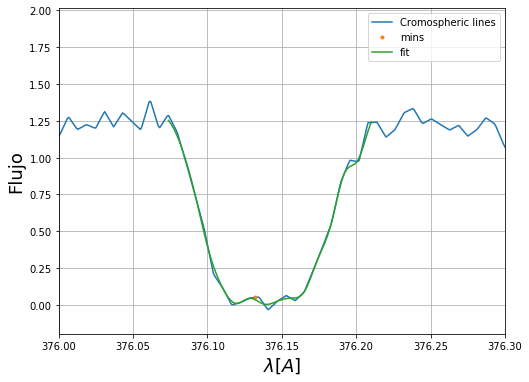

In [30]:
plt.figure(figsize = [8,6])
plt.plot(c_s['waveobs'],c_s['flux'],marker='', ls='-', label = 'Cromospheric lines')
plt.plot(lines_s['waveobs'],lines_s['flux'],marker='.', ls='', label = 'mins')
plt.plot(fit['L'],fit['I'],marker='', ls='-', label = 'fit')

plt.xlim(376,376.3)
#plt.ylim(-2.5, 3)
plt.grid()
plt.legend(loc="best")
plt.ylabel("Flujo",fontsize=18)
plt.xlabel("$\lambda [A]$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()


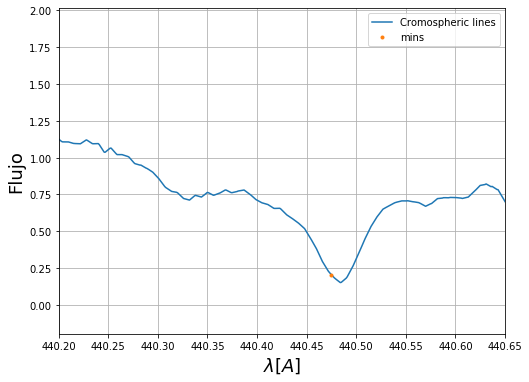

In [42]:
plt.figure(figsize = [8,6])
plt.plot(c_s['waveobs'],c_s['flux'],marker='', ls='-', label = 'Cromospheric lines')
plt.plot(lines_s['waveobs'],lines_s['flux'],marker='.', ls='', label = 'mins')
plt.xlim(440.2,440.65)
#plt.ylim(-2.5, 3)
plt.grid()
plt.legend(loc="best")
plt.ylabel("Flujo",fontsize=18)
plt.xlabel("$\lambda [A]$",fontsize=18)
#plt.legend(fontsize = 14)
plt.show()

In [ ]:
mins #Punto de tabla
Data[mins['L']+]